## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['YEARS_BIRTH']=app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
5         46.413699
6         37.747945
7         51.643836
8         55.065753
9         39.641096
10        27.936986
11        55.936986
12        36.819178
13        38.591781
14        39.953425
15        23.912329
16        35.427397
17        26.783562
18        48.542466
19        31.090411
20        50.005479
21        40.589041
22        30.536986
23        68.019178
24        30.920548
25        52.969863
26        51.298630
27        43.693151
28        27.380822
29        28.331507
            ...    
307481    56.558904
307482    38.646575
307483    68.249315
307484    35.197260
307485    32.802740
307486    43.863014
307487    63.356164
307488    27.649315
307489    45.126027
307490    27.052055
307491    30.071233
307492    57.438356
307493    48.035616
307494    40.980822
307495    57.320548
307496    47.520548
307497    45.695890
307498    52.334247
307499    46.542466


In [4]:
app_train["DIS_YEARS_BIRTH"] = pd.cut( app_train['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
app_train["DIS_YEARS_BIRTH"]

0         (25.0, 30.0]
1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
6         (35.0, 40.0]
7         (50.0, 55.0]
8         (55.0, 60.0]
9         (35.0, 40.0]
10        (25.0, 30.0]
11        (55.0, 60.0]
12        (35.0, 40.0]
13        (35.0, 40.0]
14        (35.0, 40.0]
15        (20.0, 25.0]
16        (35.0, 40.0]
17        (25.0, 30.0]
18        (45.0, 50.0]
19        (30.0, 35.0]
20        (50.0, 55.0]
21        (40.0, 45.0]
22        (30.0, 35.0]
23        (65.0, 70.0]
24        (30.0, 35.0]
25        (50.0, 55.0]
26        (50.0, 55.0]
27        (40.0, 45.0]
28        (25.0, 30.0]
29        (25.0, 30.0]
              ...     
307481    (55.0, 60.0]
307482    (35.0, 40.0]
307483    (65.0, 70.0]
307484    (35.0, 40.0]
307485    (30.0, 35.0]
307486    (40.0, 45.0]
307487    (60.0, 65.0]
307488    (25.0, 30.0]
307489    (45.0, 50.0]
307490    (25.0, 30.0]
307491    (30.0, 35.0]
307492    (55.0, 60.0]
307493    (

In [5]:
app_train["DIS_YEARS_BIRTH"].value_counts().sort_index()

(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(60.0, 65.0]    27476
(65.0, 70.0]     8103
Name: DIS_YEARS_BIRTH, dtype: int64

In [7]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,YEARS_BIRTH,DIS_YEARS_BIRTH
0,100002,1,0,0,1,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,1,0,1,0,False,25.920548,"(25.0, 30.0]"
1,100003,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,1,0,False,45.931507,"(45.0, 50.0]"
2,100004,0,1,1,1,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,False,52.180822,"(50.0, 55.0]"
3,100006,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,False,52.068493,"(50.0, 55.0]"
4,100007,0,0,0,1,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,False,54.608219,"(50.0, 55.0]"
5,100008,0,0,0,1,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,False,46.413699,"(45.0, 50.0]"
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,False,37.747945,"(35.0, 40.0]"
7,100010,0,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,False,51.643836,"(50.0, 55.0]"
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,True,55.065753,"(55.0, 60.0]"
9,100012,0,1,0,1,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,False,39.641096,"(35.0, 40.0]"


In [14]:
appdata = app_train.groupby(["DIS_YEARS_BIRTH"])["AMT_INCOME_TOTAL"].mean()

In [15]:
appdata

DIS_YEARS_BIRTH
(20.0, 25.0]    145349.196965
(25.0, 30.0]    164764.078910
(30.0, 35.0]    178096.685310
(35.0, 40.0]    179617.542456
(40.0, 45.0]    181633.860249
(45.0, 50.0]    179306.475713
(50.0, 55.0]    171307.989238
(55.0, 60.0]    158608.647408
(60.0, 65.0]    144782.885738
(65.0, 70.0]    118941.066642
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0,0.5,'Average Total Income')

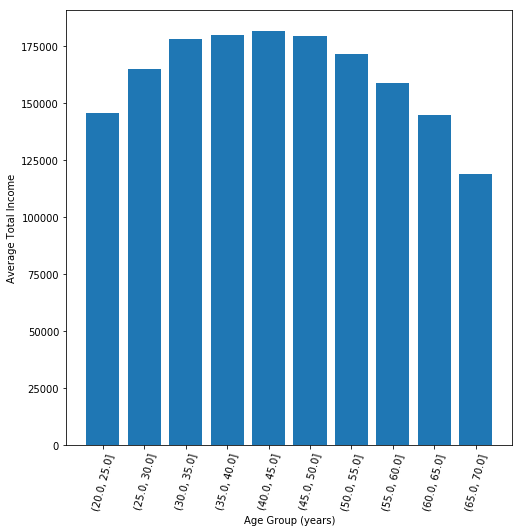

In [20]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot

plt.bar(range(len(appdata.index)), appdata)
# Plot labeling
plt.xticks(range(len(appdata.index)), appdata.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Total Income')


In [21]:
targetdata = app_train.groupby(["DIS_YEARS_BIRTH"])["TARGET"].mean()

In [22]:
targetdata

DIS_YEARS_BIRTH
(20.0, 25.0]    0.123036
(25.0, 30.0]    0.111436
(30.0, 35.0]    0.102814
(35.0, 40.0]    0.089414
(40.0, 45.0]    0.078491
(45.0, 50.0]    0.074171
(50.0, 55.0]    0.066968
(55.0, 60.0]    0.055314
(60.0, 65.0]    0.052737
(65.0, 70.0]    0.037270
Name: TARGET, dtype: float64

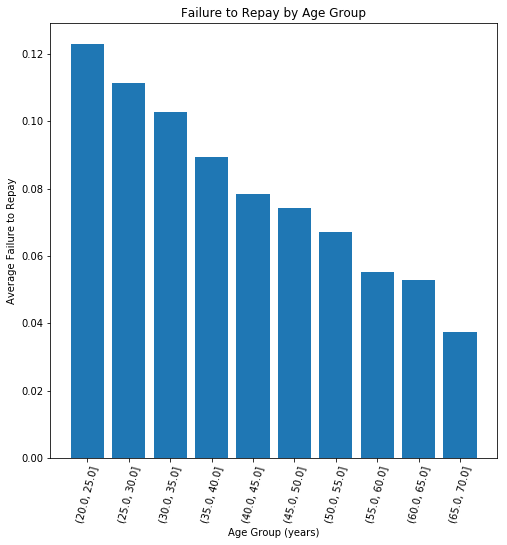

In [23]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot

plt.bar(range(len(targetdata.index)), targetdata)
# Plot labeling
plt.xticks(range(len(targetdata.index)), targetdata.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');
